In [115]:
library(readr)
library(dplyr)
library(stringr)
library(lfe)
library(ggsci)
library(lubridate)
library(tidyr)
library(ggplot2)
library(doMC)
library(gridExtra)
library(ggpubr)
library(stargazer)
library(scales)
registerDoMC(4)


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




In [4]:
fp <- '/pool001/mfzhao/'
df <- read_rds(str_c(fp, '/PROCESSED_DATA/panel_xgr.RDS'))

In [5]:
cns <- colnames(df)
cns

[1] "key"                    "date"                   "n"                     
  [4] "cluster"                "fold"                   "mcbgv.r"               
  [7] "pnchd.r"                "pgt1hafh.r"             "ppthlt75.r"            
 [10] "pgt2kmt.r"              "p1sdp.r"                "p2shp.r"               
 [13] "p3rop.r"                "p1sdpDSS.r"             "p2shpDSS.r"            
 [16] "p3ropDSS.r"             "stalter_mcbgv.r"        "stalter_pnchd.r"       
 [19] "stalter_pgt1hafh.r"     "stalter_ppthlt75.r"     "stalter_pgt2kmt.r"     
 [22] "stalter_p1sdp.r"        "stalter_p2shp.r"        "stalter_p3rop.r"       
 [25] "stalter_p1sdpDSS.r"     "stalter_p2shpDSS.r"     "stalter_p3ropDSS.r"    
 [28] "stalter_prcp01.r"       "stalter_prcp02.r"       "stalter_prcp03.r"      
 [31] "stalter_prcp04.r"       "stalter_prcp05.r"       "stalter_prcp06.r"      
 [34] "stalter_prcp07.r"       "stalter_prcp08.r"       "stalter_prcp09.r"      
 [37] "stalter_prcp10.r"       "stalter_tmax02.r"       "stalter_tmax03.r"      
 [40] "stalter_tmax04.r"       "stalter_tmax05.r"       "stalter_tmax06.r"      
 [43] "stalter_tmax07.r"       "stalter_tmax08.r"       "stalter_tmax09.r"      
 [46] "stalter_tmax10.r"       "alter_mcbgv.r"          "alter_pnchd.r"         
 [49] "alter_pgt1hafh.r"       "alter_ppthlt75.r"       "alter_pgt2kmt.r"       
 [52] "alter_p1sdp.r"          "alter_p2shp.r"          "alter_p3rop.r"         
 [55] "alter_p1sdpDSS.r"       "alter_p2shpDSS.r"       "alter_p3ropDSS.r"      
 [58] "alter_prcp01.r"         "alter_prcp02.r"         "alter_prcp03.r"        
 [61] "alter_prcp04.r"         "alter_prcp05.r"         "alter_prcp06.r"        
 [64] "alter_prcp07.r"         "alter_prcp08.r"         "alter_prcp09.r"        
 [67] "alter_prcp10.r"         "alter_tmax02.r"         "alter_tmax03.r"        
 [70] "alter_tmax04.r"         "alter_tmax05.r"         "alter_tmax06.r"        
 [73] "alter_tmax07.r"         "alter_tmax08.r"         "alter_tmax09.r"        
 [76] "alter_tmax10.r"         "log_mcbgv.r"            "log_pnchd.r"           
 [79] "log_pgt1hafh.r"         "log_ppthlt75.r"         "log_pgt2kmt.r"         
 [82] "log_stalter_mcbgv.r"    "log_stalter_pnchd.r"    "log_stalter_pgt1hafh.r"
 [85] "log_stalter_ppthlt75.r" "log_stalter_pgt2kmt.r"  "log_alter_mcbgv.r"     
 [88] "log_alter_pnchd.r"      "log_alter_pgt1hafh.r"   "log_alter_ppthlt75.r"  
 [91] "log_alter_pgt2kmt.r"    "p1sdp_l01.r"            "p2shp_l01.r"           
 [94] "p3rop_l01.r"            "stalter_p1sdp_l01.r"    "stalter_p2shp_l01.r"   
 [97] "stalter_p3rop_l01.r"    "p1sdp_l02.r"            "p2shp_l02.r"           
[100] "p3rop_l02.r"            "stalter_p1sdp_l02.r"    "stalter_p2shp_l02.r"   
[103] "stalter_p3rop_l02.r"    "p1sdp_l03.r"            "p2shp_l03.r"           
[106] "p3rop_l03.r"            "stalter_p1sdp_l03.r"    "stalter_p2shp_l03.r"   
[109] "stalter_p3rop_l03.r"    "p1sdp_l04.r"            "p2shp_l04.r"           
[112] "p3rop_l04.r"            "stalter_p1sdp_l04.r"    "stalter_p2shp_l04.r"   
[115] "stalter_p3rop_l04.r"    "p1sdp_l05.r"            "p2shp_l05.r"           
[118] "p3rop_l05.r"            "stalter_p1sdp_l05.r"    "stalter_p2shp_l05.r"   
[121] "stalter_p3rop_l05.r"    "p1sdp_l06.r"            "p2shp_l06.r"           
[124] "p3rop_l06.r"            "stalter_p1sdp_l06.r"    "stalter_p2shp_l06.r"   
[127] "stalter_p3rop_l06.r"    "p1sdp_l07.r"            "p2shp_l07.r"           
[130] "p3rop_l07.r"            "stalter_p1sdp_l07.r"    "stalter_p2shp_l07.r"   
[133] "stalter_p3rop_l07.r"    "p1sdp_l08.r"            "p2shp_l08.r"           
[136] "p3rop_l08.r"            "stalter_p1sdp_l08.r"    "stalter_p2shp_l08.r"   
[139] "stalter_p3rop_l08.r"    "p1sdp_l09.r"            "p2shp_l09.r"           
[142] "p3rop_l09.r"            "stalter_p1sdp_l09.r"    "stalter_p2shp_l09.r"   
[145] "stalter_p3rop_l09.r"    "p1sdp_l10.r"            "p2shp_l10.r"           
[148] "p3rop_l10.r"            "s

In [6]:
ldvs <- c('log_mcbgv.r', 'log_pgt2kmt.r', 'log_pgt1hafh.r', 'log_pnchd.r')

In [7]:
get_coefs <- function(dv, vars, ivmod = F, ...) {
    lhs <- str_c(dv, ' ~ ')
    rhs <- str_c(vars, '| key + date | ')

    if(ivmod == T) {
        alter_weather <- str_c(cns[str_detect(cns, '^stalter_[pt][rm][ca][px][01][0-9]$')], collapse = ' + ')
        iv <- ifelse(str_detect(dv, 'log'), str_replace(dv, 'log', 'log_stalter'), str_c('alter_', dv))
        ivf <- str_c('(', iv, ' ~ ', alter_weather, ') | cluster')
        rhs <- str_c(rhs, ivf)
    } else {
        rhs <- str_c(rhs, '0 | cluster')
    }
    form  <- as.formula(str_c(lhs, rhs))
    model <- felm(form, df, weights = df$n, ...)
    
    as.data.frame(summary(model)$coef) %>%
        mutate(var   = rownames(.),
               dv    = dv,
               model = ifelse(vars == f1, 'base', 
                              ifelse(vars == f2, 'ap', 'apnf')),
               model = ifelse(ivmod, str_c(model, ' + iv'), model)) %>%
        filter(!str_detect(var, '[pPtT][rRmM][cCaA][pPxX]')) %>%
        select(7, 6, 5, 1, 2, 3, 4) -> out
    
    colnames(out) <- c('model', 'dv', 'var', 'estimate', 'se', 't', 'p-val')
    return(out)
}

f1    <- ' p1sdp.r + p2shp.r + p3rop.r'  
f2    <- ' p1sdp.r + p2shp.r + p3rop.r + stalter_p1sdp.r + stalter_p2shp.r + stalter_p3rop.r'

foreach(dv = ldvs, .combine = rbind) %:% 
    foreach(f = c(f2), .combine = rbind) %:%
    foreach(ivmod = c(F), .combine = rbind) %dopar%
    get_coefs(dv, f, ivmod) -> coefs_dml

In [8]:
f1    <- ' p1sdp.r + p2shp.r + p3rop.r'  
f2    <- ' p1sdp.r + p2shp.r + p3rop.r + stalter_p1sdp.r + stalter_p2shp.r + stalter_p3rop.r'

In [12]:
foreach(dv = ldvs, .combine = rbind) %:% 
    foreach(f = c(f2), .combine = rbind) %:%
    foreach(ivmod = c(F), .combine = rbind) %dopar%
    get_coefs(dv, f, ivmod) -> coefs_dml

In [10]:
coefs <- read_csv(str_c(fp, 'RESULTS/DiD_results.csv'))

Parsed with column specification:
cols(
  model = col_character(),
  dv = col_character(),
  var = col_character(),
  estimate = col_double(),
  se = col_double(),
  t = col_double(),
  `p-val` = col_double()
)



In [20]:
coefs %>%
    filter(model == 'ap') %>%
    filter(str_detect(var, 'p[123]')) %>%
    mutate(type = 'linear') -> coefs

coefs_dml %>%
    mutate(var  = str_replace(var, '\\.r', ''),
           dv   = str_replace(dv, '\\.r', ''),
           type = 'dml') %>%
    bind_rows(coefs) -> coefs_both

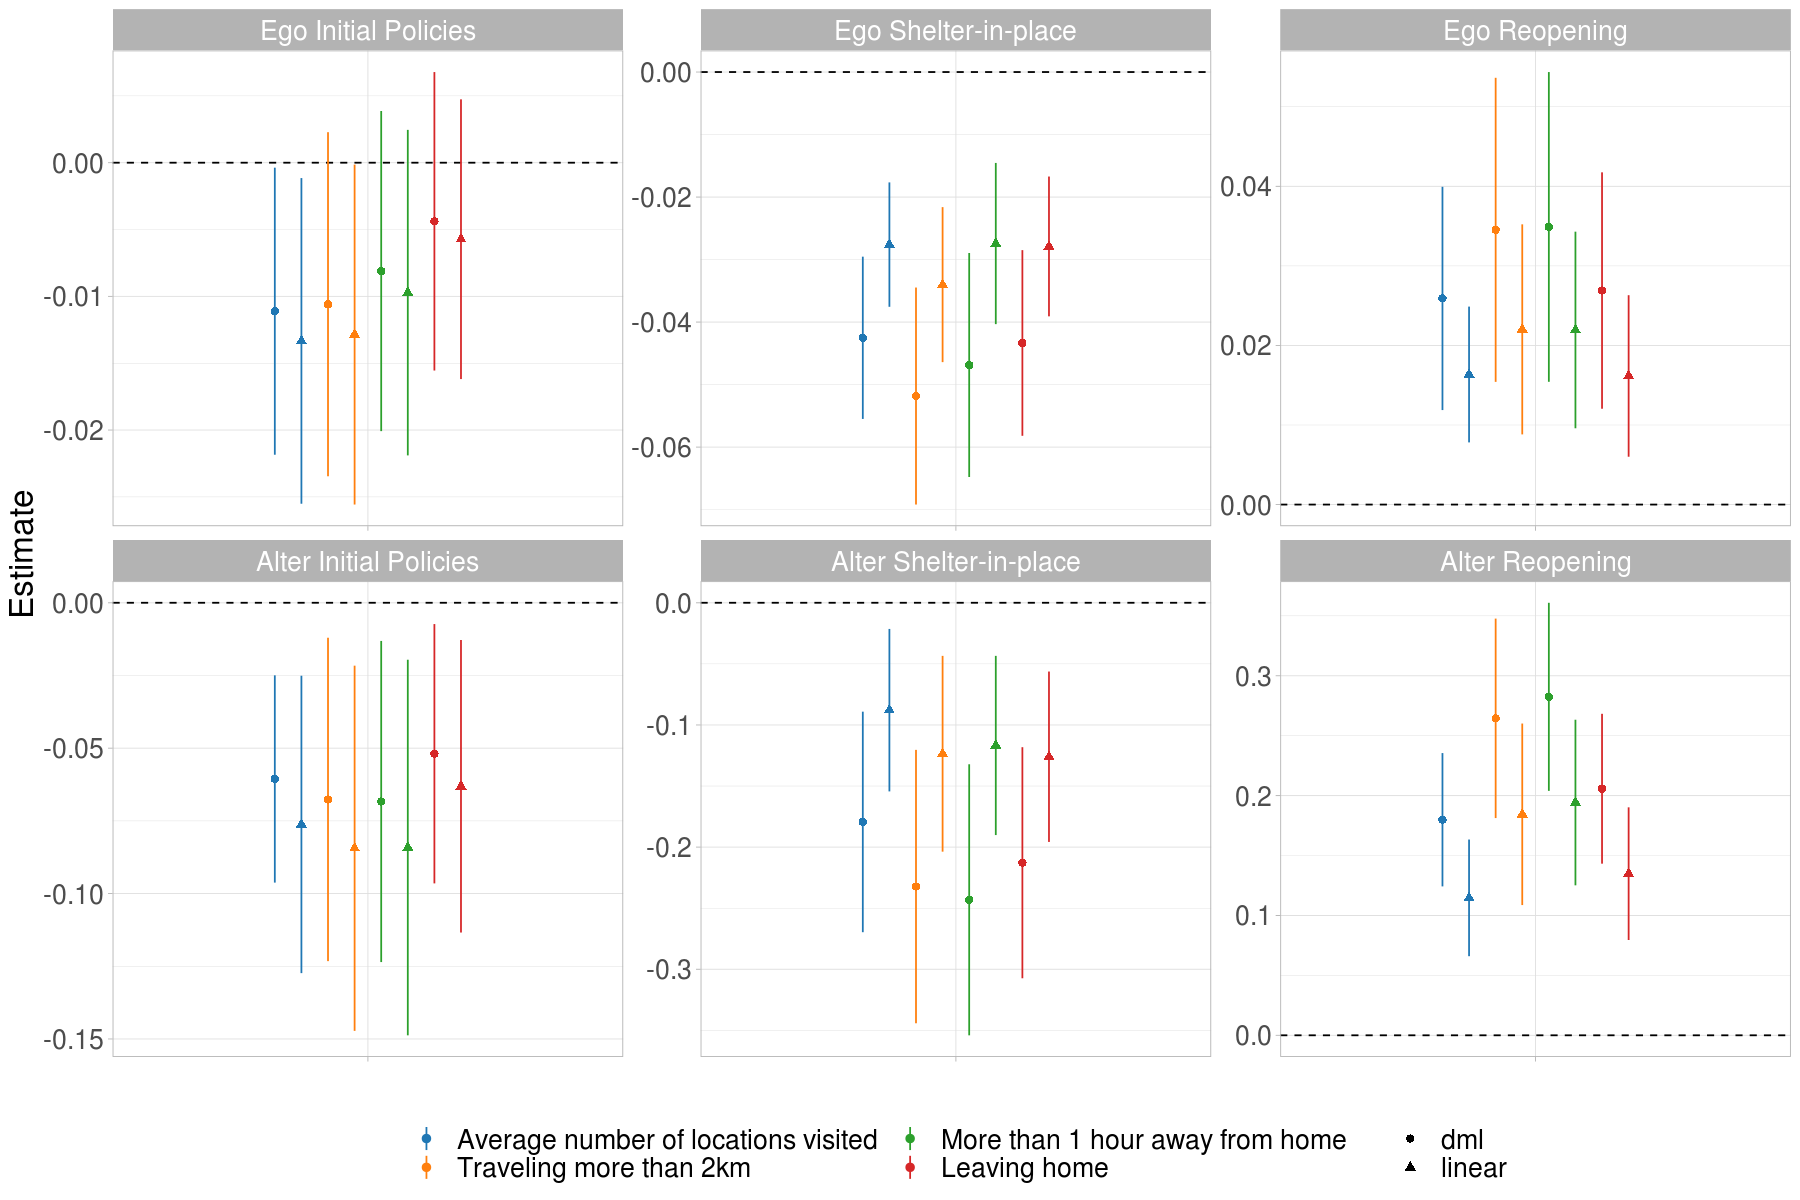

In [42]:
options(repr.plot.width=15, repr.plot.height=10)
pn <- c('p1sdp' = "Ego Initial Policies",
        'p2shp' = "Ego Shelter-in-place",
        'p3rop' = "Ego Reopening",
        'stalter_p1sdp' = "Alter Initial Policies",
        'stalter_p2shp' = "Alter Shelter-in-place",
        'stalter_p3rop' = "Alter Reopening")

coefs_both %>%
   mutate(dv = case_when(dv == 'log_mcbgv' ~ 'Average number of locations visited',
                         dv == 'log_pgt2kmt' ~ 'Traveling more than 2km',
                         dv == 'log_pgt1hafh' ~ 'More than 1 hour away from home',
                         TRUE ~ 'Leaving home'),
          dv = factor(dv, levels = c('Average number of locations visited', 
                                     'Traveling more than 2km', 
                                     'More than 1 hour away from home', 
                                     'Leaving home'))) %>%
    ggplot(aes(x = var, y = estimate, color = dv, shape = type)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_wrap(~var, scales = 'free', labeller = as_labeller(pn)) +
    xlab('') + 
    ylab('Estimate') +
    scale_color_d3() +
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom',
          legend.title = element_blank(),
          axis.text.x = element_blank()) + 
    guides(color = guide_legend(nrow = 2),
           shape = guide_legend(nrow = 2)) -> si_dml1

si_dml1

ggsave('~/SI_plots/rc4a_did_dml.pdf', si_dml1, device = 'pdf', width = 6.5, height = 5, scale = 2)

In [56]:
dyad <- read_rds(str_c(fp, 'PROCESSED_DATA/dyad_xgr.RDS'))
dyad.ndml <- data.table::fread('/pool001/mfzhao/PROCESSED_DATA/dyadic_mvmt_2020.csv')

In [63]:
dyad %>%
    left_join(dyad.ndml %>%
                  mutate(nearby = as.numeric(dist < 100)) %>%
                  select(date, dyad, nearby)) -> dyad

Joining, by = c("date", "dyad")



In [105]:
get_coefs <- function(dv, type) {
    if(type == 'all') {
        temp <- dyad
    } else {
        temp <- dyad %>%
            filter(nearby == ifelse(type == 'nearby', 1, 0))
    }
    
    if(dv == 'ndotd') {
        form <- str_c('log_ndotd.uwr ~ op1.uwr + op2.uwr + op3.uwr + dp1.uwr + dp2.uwr + dp3.uwr ',
                      '| dyad + date | 0 | origin_cluster + destination_cluster')
        fit  <- felm(as.formula(form), temp)
    } else {
        form <- str_c('log_pdotd.wr ~ op1.wr + op2.wr + op3.wr + dp1.wr + dp2.wr + dp3.wr ',
                      '| dyad + date | 0 | origin_cluster + destination_cluster')
        fit  <- felm(as.formula(form), temp, weights = temp$n)
    }

    out <- as.data.frame(summary(fit)$coef) %>%
        mutate(var  = rownames(.),
               dv   = dv, 
               type = type) %>%
        rename(estimate = Estimate, se = `Cluster s.e.`)
    
    return(out)
}

foreach(dv = c('ndotd', 'pdotd'), .combine = rbind) %:%
    foreach(type = c('all', 'nearby', 'distant'), .combine = rbind) %dopar%
    get_coefs(dv, type) -> dyad_coefs_dml

In [107]:
dyad_coefs <- read_csv(str_c(fp, 'RESULTS/dyad_results.csv'))

Parsed with column specification:
cols(
  estimate = col_double(),
  se = col_double(),
  `t value` = col_double(),
  `Pr(>|t|)` = col_double(),
  var = col_character(),
  dv = col_character(),
  type = col_character()
)



In [108]:
dyad_coefs %>%
    filter(str_detect(var, '[od]p[123]')) %>%
    mutate(method = 'linear') -> dyad_coefs


dyad_coefs_dml %>%
    mutate(var = str_replace(var, '\\.u?wr', ''),
           method = 'dml') %>%
    bind_rows(dyad_coefs) -> dyad_coefs_both

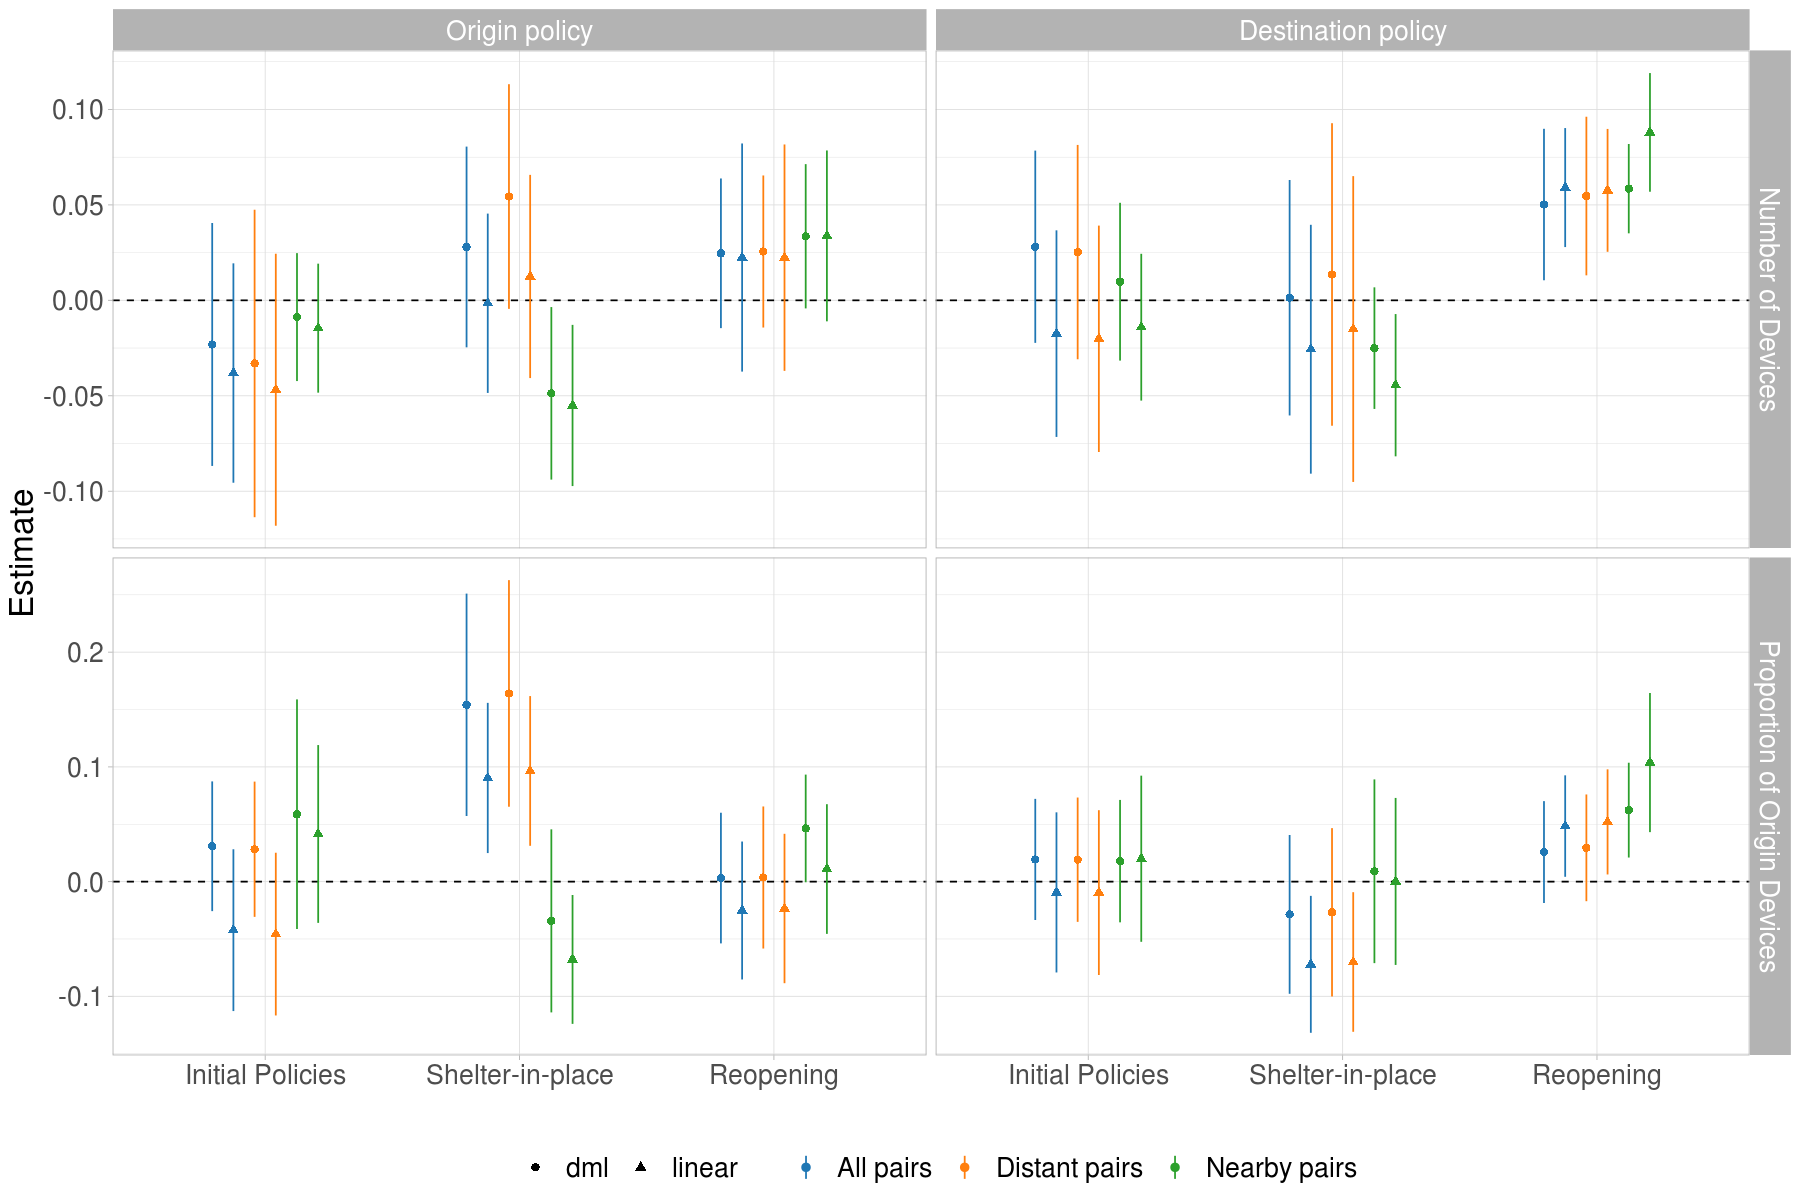

In [143]:
options(repr.plot.width=15, repr.plot.height=10)

dyad_coefs_both %>%
    rename(fit = method) %>%
    mutate(od = ifelse(str_detect(var, 'op'), 'Origin policy', 'Destination policy'),
           od = factor(od, c('Origin policy', 'Destination policy')),
           var = ifelse(str_detect(var, 'p1'), 'Initial Policies', 
                        ifelse(str_detect(var, 'p2'), 'Shelter-in-place', 'Reopening')),
           var = factor(var, levels = c('Initial Policies', 'Shelter-in-place', 'Reopening')),
           dv  = ifelse(dv == 'ndotd', 'Number of Devices', 'Proportion of Origin Devices'),) %>%
    ggplot(aes(x = var, y = estimate, color = type, shape = fit)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(width = .5), size = 2) + 
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(width = .5), size = .5) +
    facet_grid(dv~od, scales = 'free') +
    xlab('') + 
    ylab('Estimate') +
    scale_color_d3(labels = c('All pairs', 'Distant pairs', 'Nearby pairs')) + 
    labs(color = "Outcome") +
    theme_light() +
    theme(text = element_text(size=20),
          legend.position = 'bottom',
          legend.title = element_blank()) -> si_dml2

si_dml2

ggsave('~/SI_plots/rc4a_dyad_dml.pdf', si_dml2, device = 'pdf', width = 6.5, height = 5, scale = 2)

In [136]:
get_coefs2 <- function(dv, type) {
    if(type == 'all') {
        temp <- dyad
    } else {
        temp <- dyad %>%
            filter(nearby == ifelse(type == 'nearby', 1, 0))
    }
    
    if(dv == 'ndotd') {
        form <- str_c('log_ndotd.uwr ~ 0 + op1b.uwr + op2b.uwr + op0_dp1.uwr + op0_dp2.uwr + op1_dp1.uwr + ',
                      'op1_dp2.uwr + op1_dp3.uwr + op2_dp1.uwr + op2_dp2.uwr + op2_dp3.uwr + op3_dp1.uwr + ',
                      'op3_dp2.uwr + op3_dp3.uwr | 0 | 0 | origin_cluster + destination_cluster')
        fit  <- felm(as.formula(form), temp)

    } else {
        form <- str_c('log_pdotd.wr ~ 0 + op1b.wr + op2b.wr + op0_dp1.wr + op0_dp2.wr + op1_dp1.wr + ',
                      'op1_dp2.wr + op1_dp3.wr + op2_dp1.wr + op2_dp2.wr + op2_dp3.wr + op3_dp1.wr + ',
                      'op3_dp2.wr + op3_dp3.wr | 0 | 0 | origin_cluster + destination_cluster')
        fit  <- felm(as.formula(form), temp, weights = temp$n)
    }
    
    out <- as.data.frame(summary(fit)$coef) %>%
        mutate(var  = rownames(.),
               dv   = dv, 
               type = type) %>%
        filter(str_detect(var, '[od]p[123]')) %>%
        rename(estimate = Estimate, se = `Cluster s.e.`)
    
    return(out)
}

In [137]:
foreach(dv = c('ndotd', 'pdotd'), .combine = rbind) %:%
    foreach(type = c('all', 'nearby', 'distant'), .combine = rbind) %dopar%
    get_coefs2(dv, type) -> dyad_coefs2_dml

In [138]:
dyad_coefs2 <- read_csv(str_c(fp, 'RESULTS/dyad_results2.csv'))

Parsed with column specification:
cols(
  estimate = col_double(),
  se = col_double(),
  `t value` = col_double(),
  `Pr(>|t|)` = col_double(),
  var = col_character(),
  dv = col_character(),
  type = col_character()
)



In [157]:
dyad_coefs2 %>%
    filter(str_detect(var, '[od]p[123]')) %>%
    mutate(method = 'linear') -> dyad_coefs2


dyad_coefs2_dml %>%
    mutate(var = str_replace(var, 'b', ''),
           var = str_replace(var, '\\.u?wr', ''),
           method = 'dml') %>%
    bind_rows(dyad_coefs2) -> dyad_coefs2_both

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 24 rows [1, 2, 13, 14, 25, 26, 37, 38, 49, 50, 61, 62, 73, 74, 85, 86, 97, 98, 109, 110, ...].”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



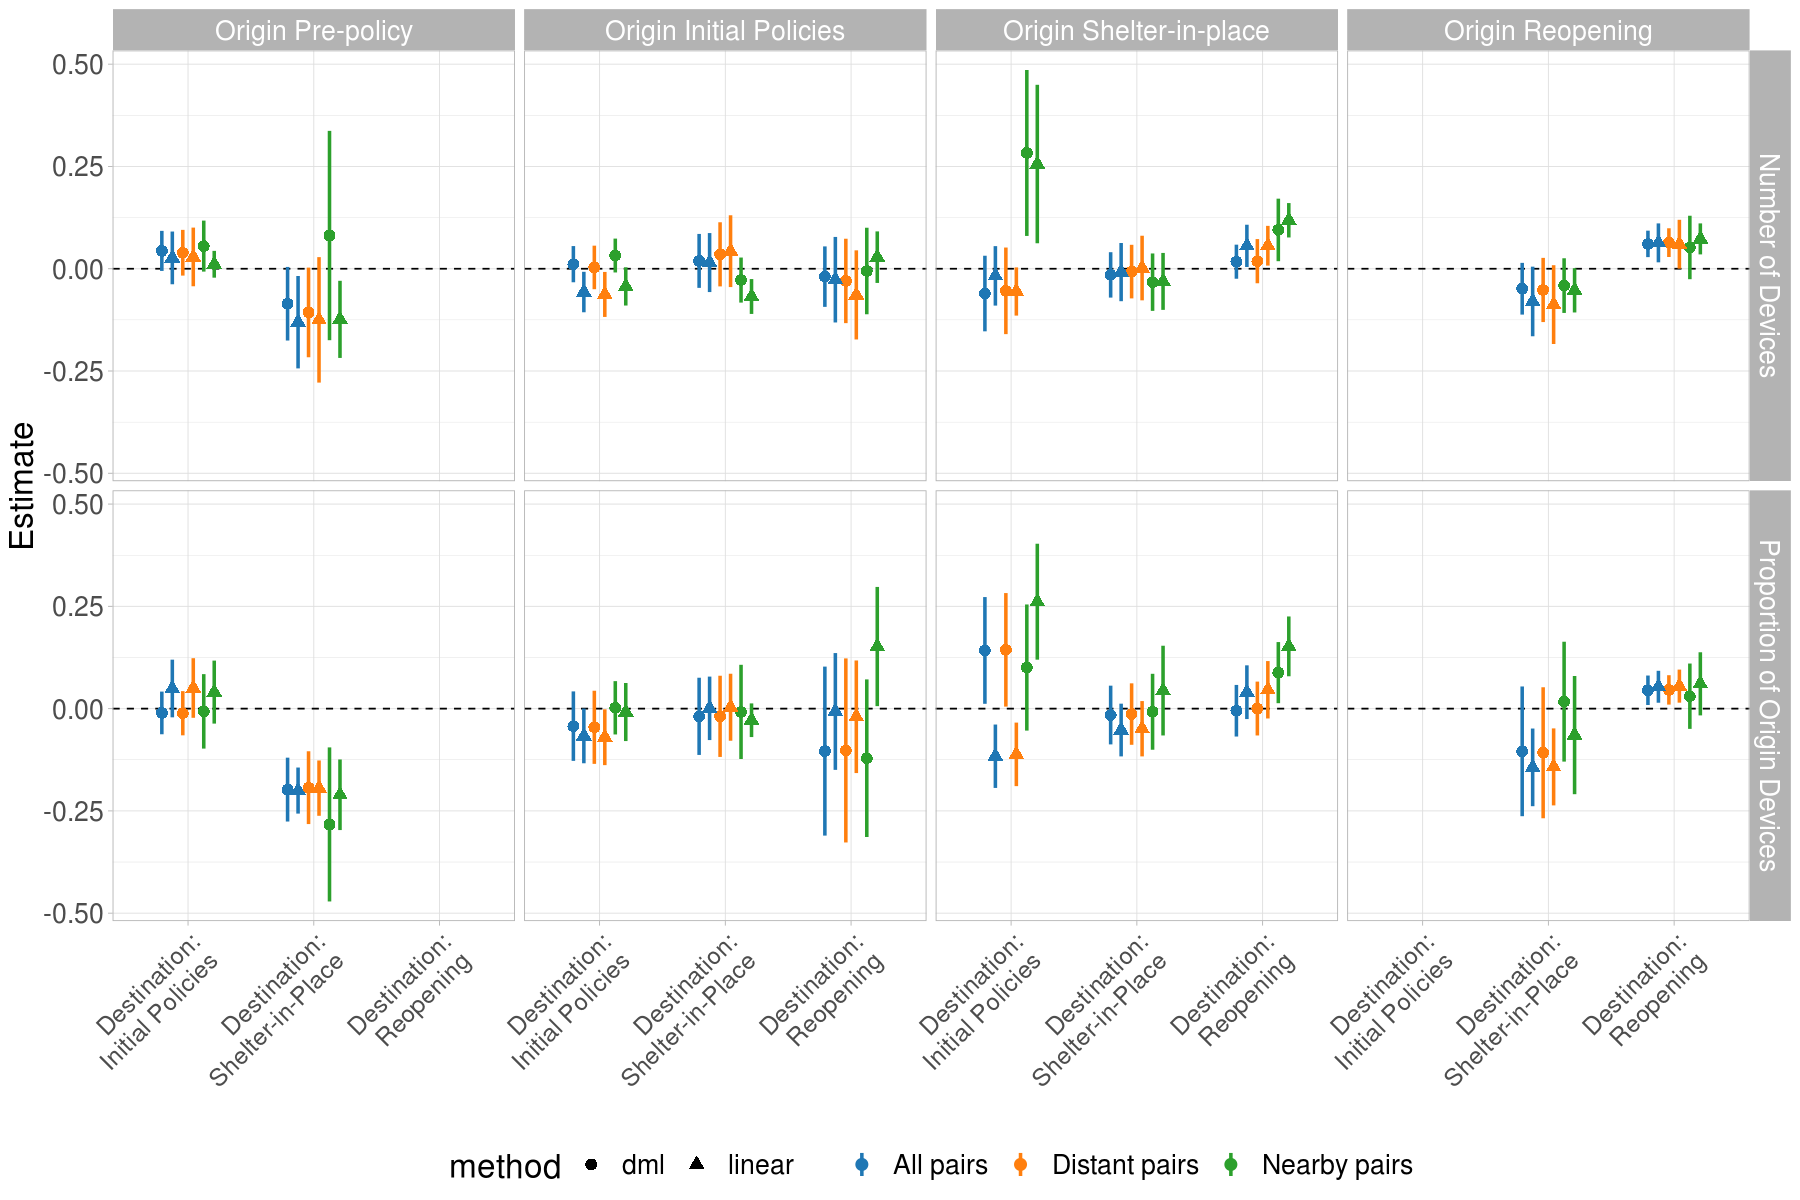

In [159]:
pn <- c('op0'   = "Origin Pre-policy",
        'op1'   = "Origin Initial Policies",
        'op2'   = "Origin Shelter-in-place",
        'op3'   = "Origin Reopening",
        'ndotd' = 'Number of Devices',
        'pdotd' = 'Proportion of Origin Devices')

dyad_coefs2_both %>%
    filter(var != 'op3_dp1') %>%
    separate(var, into = c('origin policy', 'destination policy')) %>%
    mutate(`destination policy` = ifelse(str_detect(`destination policy`, 'p1'), 'D:(ip)', 
                                        ifelse(str_detect(`destination policy`, 'p2'), 'D:(sh)', 'D:(ro)')),
           `destination policy` = factor(`destination policy`, levels = c('D:(ip)', 'D:(sh)', 'D:(ro)'))) %>%
    filter(!is.na(`destination policy`)) %>%
    ggplot(aes(x = `destination policy`, y = estimate, color = type, shape = method)) + 
    geom_hline(aes(yintercept = 0), linetype = 2) +
    geom_point(position = position_dodge(0.5), size = 3) +
    geom_linerange(aes(ymin = estimate - 1.98 * se, ymax = estimate + 1.98 * se), 
                   position = position_dodge(0.5), size = 1) +
    scale_color_d3() +
    xlab('') + 
    ylab('Estimate') +
    labs(color = '') + 
    scale_color_d3(labels = c('All pairs', 'Distant pairs', 'Nearby pairs')) + 
    scale_x_discrete(labels = c('Destination:\nInitial Policies',
                                'Destination:\nShelter-in-Place',
                                'Destination:\nReopening')) + 
    facet_grid(dv ~ `origin policy`, labeller = as_labeller(pn)) +
    theme_light() +
    theme(text = element_text(size=20),
          axis.text.x = element_text(angle = 45, 
                                     size = 15,
                                     hjust = 1,
                                     vjust = 1),
          legend.position = 'bottom') -> si_dml3

si_dml3

ggsave('~/SI_plots/rc4a_dyad_dml3.pdf', si_dml3, device = 'pdf', width = 6.5, height = 5, scale = 2)

In [161]:
get_model1 <- function(dv, vars, ivmod = F, ...) {
    lhs <- str_c(dv, ' ~ ')
    rhs <- str_c(vars, '| key + date | ')

    if(ivmod == T) {
        alter_weather <- str_c(cns[str_detect(cns, '^stalter_[pt][rm][ca][px][01][0-9]$')], collapse = ' + ')
        iv <- ifelse(str_detect(dv, 'log'), str_replace(dv, 'log', 'log_stalter'), str_c('alter_', dv))
        ivf <- str_c('(', iv, ' ~ ', alter_weather, ') | cluster')
        rhs <- str_c(rhs, ivf)
    } else {
        rhs <- str_c(rhs, '0 | cluster')
    }
    form  <- as.formula(str_c(lhs, rhs))
    model <- felm(form, df, weights = df$n, ...)
    
    return(model)
}

f1    <- ' p1sdp.r + p2shp.r + p3rop.r'  
f2    <- ' p1sdp.r + p2shp.r + p3rop.r + stalter_p1sdp.r + stalter_p2shp.r + stalter_p3rop.r'

foreach(dv = ldvs) %:% 
    foreach(f = c(f2)) %:%
    foreach(ivmod = c(F)) %dopar%
    get_model1(dv, f, ivmod) -> model_DiD_dml

In [164]:
get_models2 <- function(dv, type) {
    if(type == 'all') {
        temp <- dyad
    } else {
        temp <- dyad %>%
            filter(nearby == ifelse(type == 'nearby', 1, 0))
    }
    
    if(dv == 'ndotd') {
        form <- str_c('log_ndotd.uwr ~ op1.uwr + op2.uwr + op3.uwr + dp1.uwr + dp2.uwr + dp3.uwr ',
                      '| dyad + date | 0 | origin_cluster + destination_cluster')
        fit  <- felm(as.formula(form), temp)
    } else {
        form <- str_c('log_pdotd.wr ~ op1.wr + op2.wr + op3.wr + dp1.wr + dp2.wr + dp3.wr ',
                      '| dyad + date | 0 | origin_cluster + destination_cluster')
        fit  <- felm(as.formula(form), temp, weights = temp$n)
    }

    return(fit)
}

foreach(dv = c('ndotd', 'pdotd')) %:%
    foreach(type = c('all', 'nearby', 'distant')) %dopar%
    get_coefs(dv, type) -> model_dyad_dml